## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


## Import all the necessary Library

In [1]:
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from Utility import unwarp, undistort, displayResult, abs_sobel_thresh

%matplotlib inline

## Compute the camera calibration using chessboard images

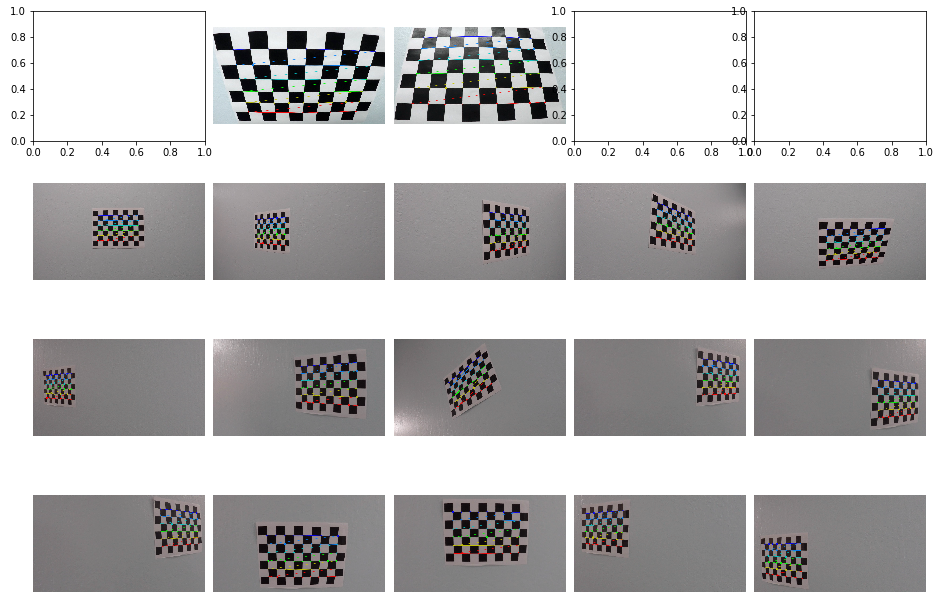

In [2]:
row = 6
column = 9

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros( (row * column, 3), np.float32)
objp[:, :2] = np.mgrid[0:column, 0:row].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

fig, axs = plt.subplots(4,5, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.05)
axs = axs.ravel()

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Step through the list and search for chessboard corners
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(grayImg, (column,row), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        
        corners2 = cv2.cornerSubPix(grayImg, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
    
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (column, row), corners, ret)
        axs[i].axis('off')
        axs[i].imshow(img)


### Test Undistortion with Chessboard

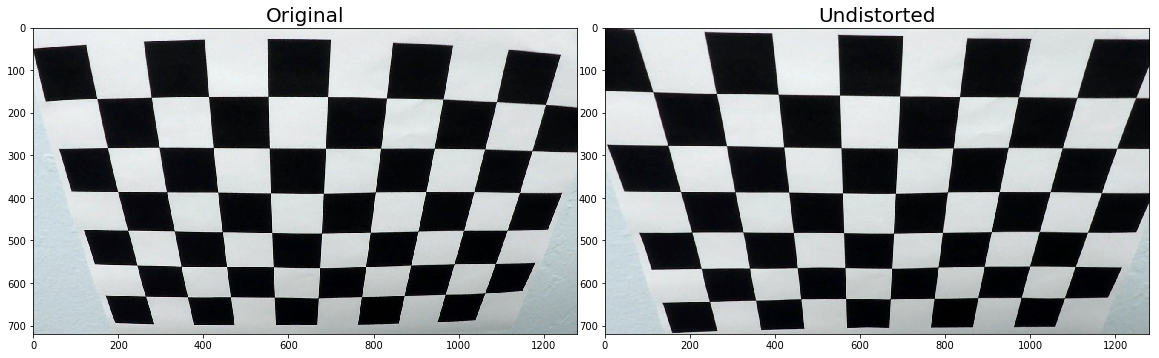

In [3]:
# Test undistortion on an image
img = cv2.imread('./camera_cal/calibration02.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
dst = undistort(img, dist, mtx)

displayResult(img, dst, "Original", "Undistorted")


### Test undistortion with Street Image

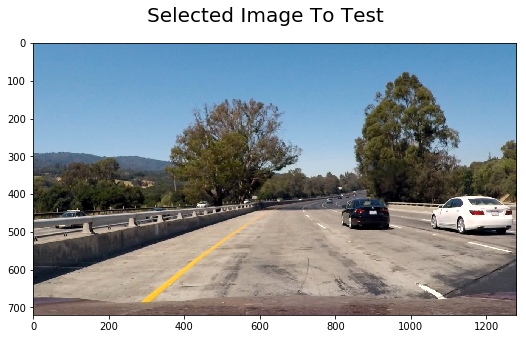

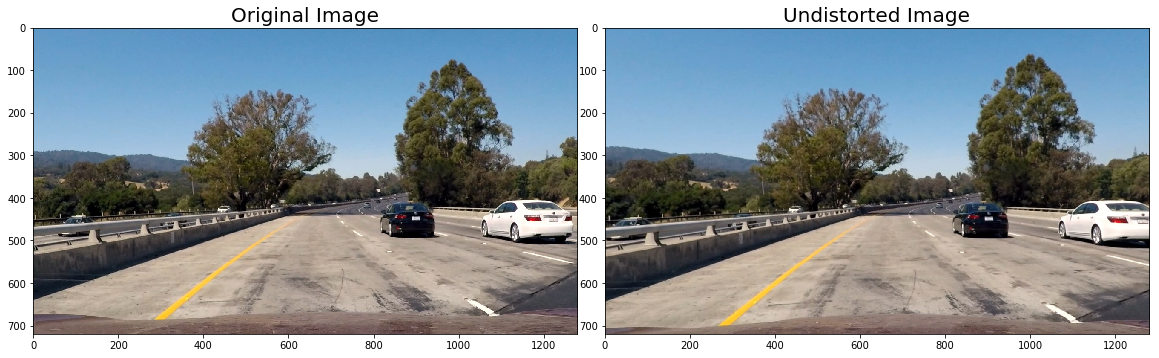

In [4]:
# Choose a test image 
aImg = cv2.imread('./test_images/test1.jpg')
aImg = cv2.cvtColor(aImg, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.suptitle("Selected Image To Test", fontsize=20)
plt.imshow(aImg)

aImg_Undistort = undistort(aImg, dist, mtx)
displayResult(aImg, aImg_Undistort, "Original Image", "Undistorted Image")

### Perspective Transform

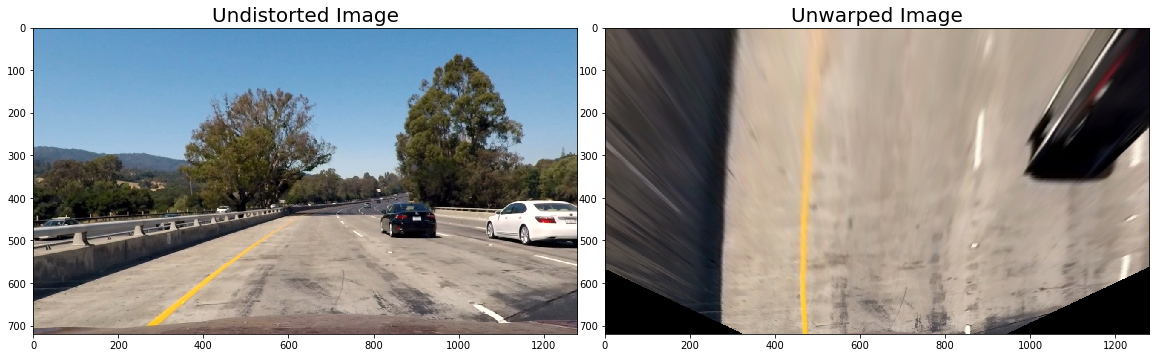

In [8]:
aImg_unwarp, M, Minv = unwarp(aImg_Undistort)

displayResult(aImg_Undistort, aImg_unwarp, 'Undistorted Image', 'Unwarped Image'  )

### Applying Sobel Operator

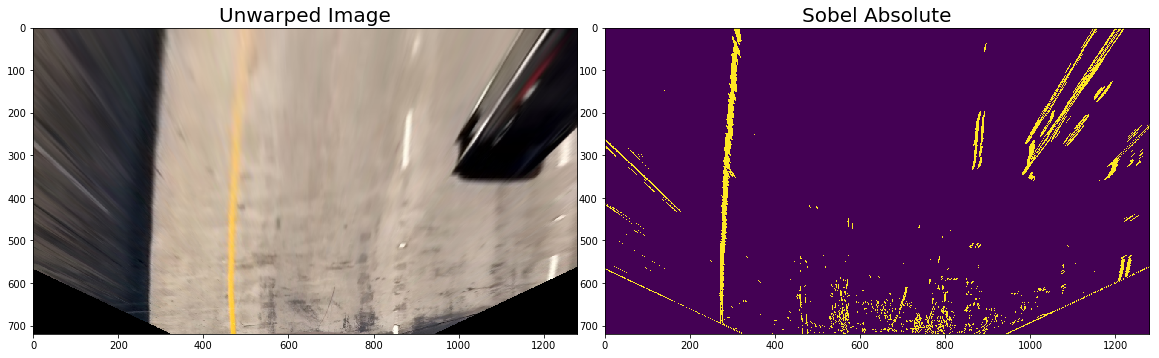

In [9]:
aImg_Sobel = abs_sobel_thresh(aImg_unwarp, orient='x', thresh_min=20, thresh_max=100)

displayResult(aImg_unwarp, aImg_Sobel, 'Unwarped Image', 'Sobel Absolute'  )